In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [89]:
# here the alorightm results are loaded, change the directory and file names accordingly 

labels = [ "ACSopt", "ASopt", "MEACOopt"]  #"AS", "ACS", "MEACO",
algo_dictionary = {}
for algo in labels:
    algo_dictionary[algo] = (np.loadtxt('/content/drive/My Drive/Natural computing/results/st70/st70'+ algo +'_timestamps.csv', delimiter = ","), np.loadtxt('/content/drive/My Drive/Natural computing/results/st70/st70'+ algo +'_history.csv', delimiter = ","))


In [97]:
# change timelimit, t is interval in seconds to take point.
# ulysses : 60
# oliver : 180
# st70: 300
# eil: 720

timelimit = 300
t = 10
times_to_extract = np.arange(10, timelimit + t , t)

In [98]:
total_plot = []

In [99]:
# this cell takes points from runs to plot, This is done since not all runs have equal amount of iterations. 
# the history points are taken closest to each timepoint in times_to_extract. s
endscores = []

for label in labels:
  print(label)
  timestamps = algo_dictionary[label][0]
  history = algo_dictionary[label][1]

  to_plot = []
  
  for times in times_to_extract:
    if times == 0:
      history_list = history[:,0]
      avg = sum(history_list)/len(history_list)
      to_plot.append(avg)
    else:
      history_list = []
      for i in range(10):
        index = np.where((timestamps[i] > 0) & (timestamps[i] <= times))[0][-1]
        history_list.append(index)
      a = history 
      a= a[np.arange(len(a)), history_list]
      avg = sum(a)/len(a)
      to_plot.append(avg)
      if times == timelimit:
        endscores.append(a)

  total_plot.append(to_plot)

ACSopt
ASopt
MEACOopt


In [103]:
endscores

[array([704., 709., 714., 713., 708., 714., 709., 707., 710., 698.]),
 array([703., 704., 695., 702., 704., 710., 709., 696., 712., 705.]),
 array([707., 710., 709., 703., 708., 711., 708., 711., 699., 698.])]

In [108]:
# use this cell to find max , min ,avg and variance of the 10 runs for each algorithm 

number=2
print(max(endscores[number]))
print(min(endscores[number]))
print(sum(endscores[number])/10)
print(np.var(endscores[number]))

711.0
698.0
706.4
20.439999999999998


In [100]:
def compare(aco_instances, labels,times_to_extract):

  for i, aco in enumerate(aco_instances):
    plt.plot(times_to_extract, aco, label = labels[i])  , #marker = "."
    plt.legend()
    plt.title("st70 - 2opt ")
    plt.xlabel("time elapsed")
    plt.ylabel("total distance")

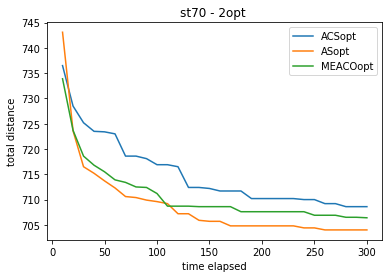

In [101]:
compare(total_plot, labels, times_to_extract)